# 데이터 생성을 위한 EDA

In [13]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
df = pd.read_csv("STR_C+G_1353.csv")
df.head()

,file_name,file_size,product_no,status,letter,environment,image_w,image_h,product_no_len,image_type,file_path
0,1.jpg,21584.0,343938 013,Diagonal,Clear,Clear,134,36,10,collect,collect/1.jpg
1,2.jpg,21794.0,AV3133 001,Horizontal,Clear,Clear,152,34,10,collect,collect/2.jpg
2,3.jpg,21129.0,CJ3817 402,Horizontal,Clear,Clear,134,26,10,collect,collect/3.jpg
3,4.PNG,21290.0,EE8484,Diagonal,Clear,Clear,168,61,6,collect,collect/4.PNG
4,5.PNG,8242.0,190943 11,Horizontal,Clear,Clear,118,37,9,collect,collect/5.PNG


수집한 데이터의 테이블을 생성
- 총 153장의 이미지

In [12]:
collect = df[df['image_type']=='collect'].copy()
collect.head()

,file_name,file_size,product_no,status,letter,environment,image_w,image_h,product_no_len,image_type,file_path
0,1.jpg,21584.0,343938 013,Diagonal,Clear,Clear,134,36,10,collect,collect/1.jpg
1,2.jpg,21794.0,AV3133 001,Horizontal,Clear,Clear,152,34,10,collect,collect/2.jpg
2,3.jpg,21129.0,CJ3817 402,Horizontal,Clear,Clear,134,26,10,collect,collect/3.jpg
3,4.PNG,21290.0,EE8484,Diagonal,Clear,Clear,168,61,6,collect,collect/4.PNG
4,5.PNG,8242.0,190943 11,Horizontal,Clear,Clear,118,37,9,collect,collect/5.PNG


## 이미지/글자/촬영 상태

In [14]:
collect.groupby(['status']).count()

,file_name,file_size,product_no,letter,environment,image_w,image_h,product_no_len,image_type,file_path
status,,,,,,,,,,
Diagonal,52,51,52,52,52,52,52,52,52,52
Horizontal,87,87,87,87,87,87,87,87,87,87
Left_Rot,7,7,7,7,7,7,7,7,7,7
Right_Rot,7,7,7,7,7,7,7,7,7,7


In [15]:
collect.groupby(['letter']).count()

,file_name,file_size,product_no,status,environment,image_w,image_h,product_no_len,image_type,file_path
letter,,,,,,,,,,
Blur,25,25,25,25,25,25,25,25,25,25
Clear,105,104,105,105,105,105,105,105,105,105
Dirty,1,1,1,1,1,1,1,1,1,1
Tilted,22,22,22,22,22,22,22,22,22,22


In [16]:
collect.groupby(['environment']).count()

,file_name,file_size,product_no,status,letter,image_w,image_h,product_no_len,image_type,file_path
environment,,,,,,,,,,
Clear,135,134,135,135,135,135,135,135,135,135
Clear\n,1,1,1,1,1,1,1,1,1,1
Reflection,8,8,8,8,8,8,8,8,8,8
Shadow,9,9,9,9,9,9,9,9,9,9


In [17]:
collect.groupby(['status', 'letter', 'environment']).count()

file_name  file_size  ...  image_type  file_path
status     letter environment                        ...                       
Diagonal   Blur   Clear                8          8  ...           8          8
                  Shadow               3          3  ...           3          3
           Clear  Clear               36         35  ...          36         36
                  Reflection           1          1  ...           1          1
           Dirty  Clear                1          1  ...           1          1
           Tilted Clear                3          3  ...           3          3
Horizontal Blur   Clear                6          6  ...           6          6
                  Reflection           1          1  ...           1          1
                  Shadow               2          2  ...           2          2
           Clear  Clear               61         61  ...          61         61
                  Clear\n              1          1  ...           1          1
                  Reflection           3          3  ...           3          3
           Tilted Clear               10         10  ...          10         10
                  Reflection           3          3  ...           3          3
Left_Rot   Blur   Clear                1          1  ...           1          1
                  Shadow               2          2  ...           2          2
           Clear  Clear                1          1  ...           1          1
           Tilted Clear                2          2  ...           2          2
                  Shadow               1          1  ...           1          1
Right_Rot  Blur   Clear                1          1  ...           1          1
                  Shadow               1          1  ...           1          1
           Clear  Clear                2          2  ...           2          2
           Tilted Clear                3          3  ...           3          3

[23 rows x 8 columns]

## 이미지 가로, 세로 

### Joint Plot

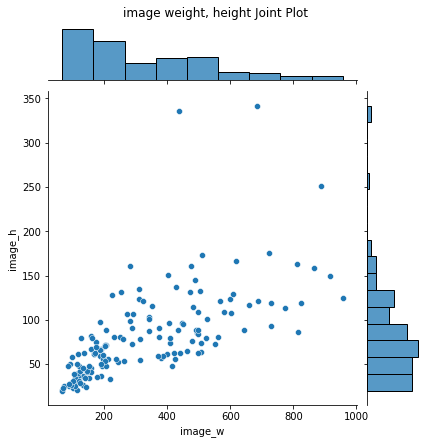

In [18]:
sns.jointplot(x="image_w", y="image_h", data=collect)
plt.suptitle("image weight, height Joint Plot", y=1.02)
plt.show()

### 통계치

In [19]:
arr_h = []
arr_w = []
for h, w in zip(collect['image_h'], collect['image_w']):
    arr_h.append(h)
    arr_w.append(w)

In [23]:
# 이미지 가로 및 세로 최대 길이, 최소 길이, 평균값, 중앙값, 최빈값
print('이미지 가로, 세로')
print('최대 길이 :',np.max(arr_w), np.max(arr_h))
print('최소 길이 :',np.min(arr_w), np.min(arr_h))
print('평균값 :',np.mean(arr_w), np.mean(arr_h))
print('중앙값 :',np.median(arr_w), np.median(arr_h))
print('최빈값 :',stats.mode(arr_w)[0][0], stats.mode(arr_h)[0][0])

이미지 가로, 세로
최대 길이 : 957 342
최소 길이 : 67 20
평균값 : 326.16993464052285 80.33333333333333
중앙값 : 259.0 70.0
최빈값 : 134 48


## 상품번호 길이

### KDE Plot

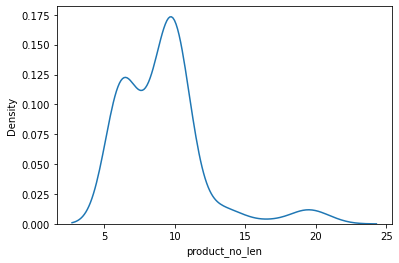

In [25]:
sns.kdeplot(collect['product_no_len'])

### 통계치

In [26]:
arr_len = []
for i in collect['product_no']:
    arr_len.append(len(i))

In [27]:
# 상품번호 최대 길이, 최소 길이, 평균값, 중앙값, 최빈값
print('상품번호')
print('최대 길이 :',np.max(arr_len))
print('최소 길이 :',np.min(arr_len))
print('평균값 :',np.mean(arr_len))
print('중앙값 :',np.median(arr_len))
print('최빈값 :',stats.mode(arr_len)[0][0])

상품번호
최대 길이 : 21
최소 길이 : 6
평균값 : 9.130718954248366
중앙값 : 9.0
최빈값 : 10


## 이미지 가로, 세로와 상품번호 글자 수

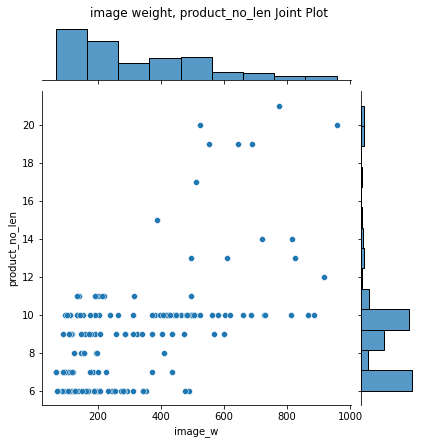

In [28]:
sns.jointplot(x="image_w", y="product_no_len", data=collect)
plt.suptitle("image weight, product_no_len Joint Plot", y=1.02)
plt.show()

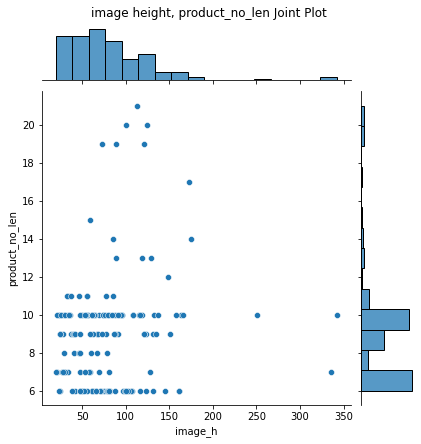

In [29]:
sns.jointplot(x="image_h", y="product_no_len", data=collect)
plt.suptitle("image height, product_no_len Joint Plot", y=1.02)
plt.show()

# Train/Valid/Test를 나누기 위한 EDA
- 수집한 이미지의 일부만 학습 및 검증 데이터로 사용
- 100장은  

In [31]:
pip install iterative-stratification

In [32]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

## Test 데이터

In [34]:
collect[collect['status']=='Left_Rot']

,file_name,file_size,product_no,status,letter,environment,image_w,image_h,product_no_len,image_type,file_path
114,KakaoTalk_20211206_145622269_00.jpg,38418.0,SPW302621G,Left_Rot,Tilted,Clear,406,96,10,collect,collect/KakaoTalk_20211206_145622269_00.jpg
115,KakaoTalk_20211206_145622269_03.jpg,48808.0,F1XK25241-BEG,Left_Rot,Tilted,Clear,824,119,13,collect,collect/KakaoTalk_20211206_145622269_03.jpg
116,KakaoTalk_20211206_145622269_04.jpg,39623.0,M9166C,Left_Rot,Blur,Clear,475,161,6,collect,collect/KakaoTalk_20211206_145622269_04.jpg
122,KakaoTalk_20211206_145622269_01.jpg,64658.0,EVM 004001,Left_Rot,Blur,Shadow,887,251,10,collect,collect/KakaoTalk_20211206_145622269_01.jpg
123,KakaoTalk_20211206_145622269_16.jpg,38753.0,B25176,Left_Rot,Clear,Clear,311,123,6,collect,collect/KakaoTalk_20211206_145622269_16.jpg
125,KakaoTalk_20211206_145622269_02.jpg,49310.0,CK2351-101,Left_Rot,Tilted,Shadow,865,158,10,collect,collect/KakaoTalk_20211206_145622269_02.jpg
126,KakaoTalk_20211206_145622269_15.jpg,27217.0,751505,Left_Rot,Blur,Shadow,207,88,6,collect,collect/KakaoTalk_20211206_145622269_15.jpg


In [35]:
collect[collect['status']=='Right_Rot']

,file_name,file_size,product_no,status,letter,environment,image_w,image_h,product_no_len,image_type,file_path
117,KakaoTalk_20211206_145622269_05.jpg,68190.0,S001XG0,Right_Rot,Clear,Clear,436,336,7,collect,collect/KakaoTalk_20211206_145622269_05.jpg
118,KakaoTalk_20211206_145622269_06.jpg,36095.0,MVOSB407,Right_Rot,Tilted,Clear,410,79,8,collect,collect/KakaoTalk_20211206_145622269_06.jpg
119,KakaoTalk_20211206_145622269_07.jpg,30902.0,Q23449,Right_Rot,Blur,Shadow,342,101,6,collect,collect/KakaoTalk_20211206_145622269_07.jpg
120,KakaoTalk_20211206_145622269_08.jpg,40822.0,908999-016,Right_Rot,Tilted,Clear,449,95,10,collect,collect/KakaoTalk_20211206_145622269_08.jpg
121,KakaoTalk_20211206_145622269_09.jpg,52627.0,AH5222-100,Right_Rot,Blur,Clear,813,163,10,collect,collect/KakaoTalk_20211206_145622269_09.jpg
124,KakaoTalk_20211206_145622269_17.jpg,42556.0,DD1503 109,Right_Rot,Tilted,Clear,618,166,10,collect,collect/KakaoTalk_20211206_145622269_17.jpg
127,KakaoTalk_20211206_145622269_18.jpg,76739.0,DD1503 109,Right_Rot,Clear,Clear,685,342,10,collect,collect/KakaoTalk_20211206_145622269_18.jpg


In [39]:
collect[collect['status']=='Diagonal'].groupby(['letter']).count()

,file_name,file_size,product_no,status,environment,image_w,image_h,product_no_len,image_type,file_path
letter,,,,,,,,,,
Blur,11,11,11,11,11,11,11,11,11,11
Clear,37,36,37,37,37,37,37,37,37,37
Dirty,1,1,1,1,1,1,1,1,1,1
Tilted,3,3,3,3,3,3,3,3,3,3


In [37]:
collect[collect['status']=='Horizontal']

,file_name,file_size,product_no,status,letter,environment,image_w,image_h,product_no_len,image_type,file_path
1,2.jpg,21794.0,AV3133 001,Horizontal,Clear,Clear,152,34,10,collect,collect/2.jpg
2,3.jpg,21129.0,CJ3817 402,Horizontal,Clear,Clear,134,26,10,collect,collect/3.jpg
4,5.PNG,8242.0,190943 11,Horizontal,Clear,Clear,118,37,9,collect,collect/5.PNG
8,9.PNG,12391.0,3JM00740,Horizontal,Clear,Clear,146,41,8,collect,collect/9.PNG
13,14.PNG,21226.0,FV0657,Horizontal,Clear,Clear,173,75,6,collect,collect/14.PNG
...,...,...,...,...,...,...,...,...,...,...,...
144,j20.jpg,10641.0,W480WS5,Horizontal,Clear,Clear,373,81,7,collect,collect/j20.jpg
147,j24.jpg,24293.0,1RM02002E-100,Horizontal,Clear,Clear,609,129,13,collect,collect/j24.jpg
148,j25.jpg,15860.0,1RM01263D-125,Horizontal,Tilted,Clear,497,89,13,collect,collect/j25.jpg
150,j27.jpg,20378.0,415445-102,Horizontal,Clear,Clear,581,109,10,collect,collect/j27.jpg
